Uninformed Search Algorithm:
It is also known as blind search algorithms, area class of search algoritms that do not use any domain-specific knowlwdge about the problem
being solved. It rely on the information provided in the problem defination such as, initial state, action available and the goal state:

Types of Uninformed search algorithms are:

Breadth-First Search:
It explores the problem level by level.It first visits all nodes that are closest to the start then moves to the next level. BFS uses queue so the node that is added first is explored first.

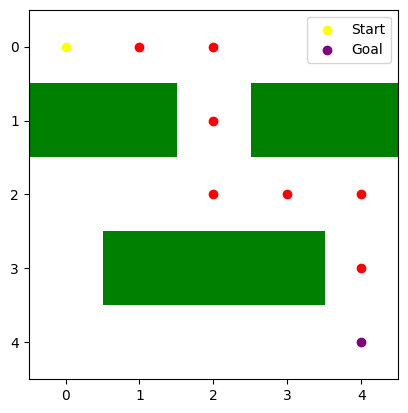

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import deque

def bfs(maze, start, goal):
    queue = deque([(start, [])])
    visited = set()

    while queue:
        current, path = queue.popleft()

        if current == goal:
            return path + [current]

        if current in visited:
            continue

        visited.add(current)
        x, y = current  

        for dx, dy in [(0,1), (0,-1), (1,0), (-1,0)]:
            nx, ny = x + dx, y + dy

            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
                queue.append(((nx, ny), path + [current]))

    return None  


def visualize_maze(maze, start, goal, path=None):
    cmap = ListedColormap(['white', 'black', 'green'])

    fig, ax = plt.subplots()  
    ax.imshow(maze, cmap=cmap)

    ax.scatter(start[1], start[0], color='yellow', label='Start')
    ax.scatter(goal[1], goal[0], color='purple', label='Goal')

    if path:
        for node in path[1:-1]:
            ax.scatter(node[1], node[0], color='red')

    ax.legend()
    plt.show()


maze = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 4)

path = bfs(maze, start, goal)
visualize_maze(maze, start, goal, path)


Depth-First Search:
It explores one path completely before trying another path. It goes as deep as possible then comes back(backtracking). DFS uses a stack or recursion. It does not guarentee the shortest path and it can even get stuck in an infinite path. But efficient for deep exploration.

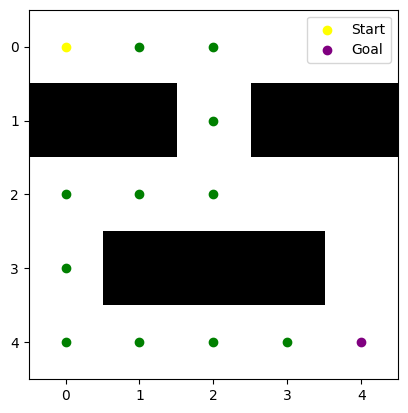

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def visualize_maze(maze, start, goal, path=None):
    cmap = ListedColormap(['white', 'black', 'red', 'blue', 'green'])
    bounds = [0, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = plt.Normalize(bounds[0], bounds[-1])
    
    fig, ax = plt.subplots()
    ax.imshow(maze, cmap=cmap, norm=norm)
    
    ax.scatter(start[1], start[0], color='yellow', marker='o', label='Start')
    ax.scatter(goal[1], goal[0], color='purple', marker='o', label='Goal')
    
    if path:
        for node in path[1:-1]:
            ax.scatter(node[1], node[0], color='green', marker='o')
    
    ax.legend()
    plt.show()

def dfs(maze, start, goal):
    stack = [(start, [])]
    visited = set()
    
    while stack:
        current, path = stack.pop()
        x, y = current
        
        if current == goal:
            return path + [current]
        
        if current in visited:
            continue
        
        visited.add(current)
        
        for dx, dy in [(0, 1), (0, -1), (1, 0), (-1, 0)]:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(maze) and 0 <= ny < len(maze[0]) and maze[nx][ny] != 1:
                stack.append(((nx, ny), path + [current]))
    
    return None

#maze
maze = np.array([
    [0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1],
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
])

start = (0, 0)
goal = (4, 4)

path = dfs(maze, start, goal)

visualize_maze(maze, start, goal, path)